In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug = "data/mouse_drug_data.csv"
clinical_trial = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug)
clinical_trial_df = pd.read_csv(clinical_trial)

# Combine the data into a single dataset
merged = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID", how="outer")

# Display the data table for preview
    # Checking counts
    #merged.count()
    #mouse_drug_df.count()
    #clinical_trial_df.count()
merged.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_by_merged = merged.groupby(['Drug','Timepoint'])
mean_tumor_volume=grouped_by_merged["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mtv_df=mean_tumor_volume.to_frame()

# Preview DataFrame
mtv_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume=grouped_by_merged["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
stv_df=sem_tumor_volume.to_frame()

# Preview DataFrame
stv_df.head(3)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684

In [4]:
grouped_by_timeline = mtv_df.groupby(['Timepoint','Drug'])
grouped_by_timeline = grouped_by_timeline["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
time_df=grouped_by_timeline.to_frame().reset_index()

# Preview DataFrame
#print (type (time_df))
time_df.head(3)

,Timepoint,Drug,Tumor Volume (mm3)
0,0,Capomulin,45.0
1,0,Ceftamin,45.0
2,0,Infubinol,45.0


In [5]:
# Minor Data Munging to Re-Format the Data Frames using unstack
organized_df = mtv_df.unstack(level='Drug')

#Convert MultiIndex to single index to get desired drug columns
organized_df.columns = organized_df.columns.get_level_values(1)
organized_df = organized_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Preview that Reformatting worked
organized_df


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [6]:
# Generting tumor volume changes
capomulin_change= ((organized_df.loc[45,"Capomulin"]-organized_df.loc[0,"Capomulin"])/(organized_df.loc[0,"Capomulin"]))*100
Infubinol_change= ((organized_df.loc[45,"Infubinol"]-organized_df.loc[0,"Infubinol"])/(organized_df.loc[0,"Infubinol"]))*100
Ketapril_change= ((organized_df.loc[45,"Ketapril"]-organized_df.loc[0,"Ketapril"])/(organized_df.loc[0,"Ketapril"]))*100
Placebo_change= ((organized_df.loc[45,"Placebo"]-organized_df.loc[0,"Placebo"])/(organized_df.loc[0,"Placebo"]))*100

capomulin_change

-19.475302667894173

In [7]:

organized_df.columns

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object', name='Drug')

In [8]:
# SEM Minor Data Munging to Re-Format the Data Frames using unstack
sem_organized_df = stv_df.unstack(level='Drug')
sem_organized_df

# Convert MultiIndex to single index to get desired drug columns
sem_organized_df.columns = sem_organized_df.columns.get_level_values(1)
sem_organized_df = sem_organized_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Preview that Reformatting worked
sem_organized_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


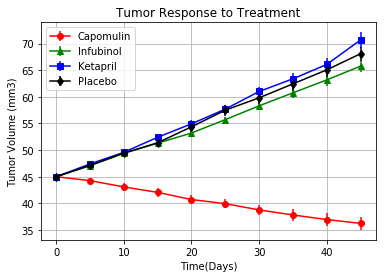

In [9]:
# Generate the Plot (with Error Bars)
x_axis=organized_df.index

Capomulin_axis=organized_df['Capomulin'].values
#lineplot = plt.plot(x_axis, Capomulin_axis, marker ='o', color='R', label="Capomulin")
Capomulin_sem_axis=sem_organized_df['Capomulin'].values

Infubinol_axis=organized_df['Infubinol'].values
#lineplot = plt.plot(x_axis, Infubinol_axis, marker ='^', color='B', label="Infubinol")
Infubinol_sem_axis=sem_organized_df['Infubinol'].values

Ketapril_axis=organized_df['Ketapril'].values
#lineplot = plt.plot(x_axis, Ketapril_axis, marker ='s', color='G', label="Ketapril")
Ketapril_sem_axis=sem_organized_df['Ketapril'].values

Placebo_axis=organized_df['Placebo'].values
#lineplot = plt.plot(x_axis, Placebo_axis, marker ='d', color='K', label="Placebo")
Placebo_sem_axis=sem_organized_df['Placebo'].values

# Setting up the plot
fig, ax = plt.subplots()

ax.errorbar(x_axis,Capomulin_axis, Capomulin_sem_axis, marker ='o', color='R', label="Capomulin")
ax.errorbar(x_axis,Infubinol_axis, Infubinol_sem_axis, marker ='^', color='G', label="Infubinol")
ax.errorbar(x_axis,Ketapril_axis, Ketapril_sem_axis, marker ='s', color='B', label="Ketapril")
ax.errorbar(x_axis,Placebo_axis, Placebo_sem_axis, marker ='d', color='K', label="Placebo")

# Adds a legend and sets its location to the upper left
plt.legend(loc="upper left")

# Add Title and labels to the x and y axes
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")

# Set a grid on the plot
plt.grid()

# Save the Figure
plt.savefig("../Images/Tumor response w error bar.png")

In [10]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_by_merged = merged.groupby(['Drug','Timepoint'])
mean_meta=grouped_by_merged["Metastatic Sites"].mean()

# Convert to DataFrame
meta_df=mean_meta.to_frame()

# Preview DataFrame
meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_meta=grouped_by_merged["Metastatic Sites"].sem()

# Convert to DataFrame
sem_meta_df=sem_meta.to_frame()

# Preview DataFrame
sem_meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
# Minor Data Munging to Re-Format the Data Frames using unstack
meta_df = meta_df.unstack(level='Drug')

#Convert MultiIndex to single index to get desired drug columns
meta_df.columns = meta_df.columns.get_level_values(1)
meta_df = meta_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Preview that Reformatting worked
meta_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [14]:
# SEM Minor Data Munging to Re-Format the Data Frames
sem_meta_df= sem_meta_df.unstack(level='Drug')
sem_meta_df.head()

#Convert MultiIndex to single index to get desired drug columns
sem_meta_df.columns = sem_meta_df.columns.get_level_values(1)
sem_meta_df = sem_meta_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Preview that Reformatting worked
sem_meta_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


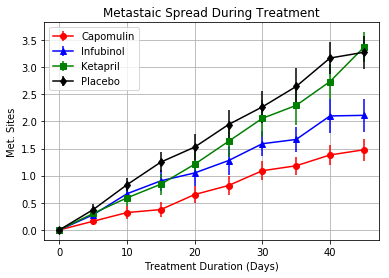

In [15]:
# Generate the Plot (with Error Bars)
x_axis=meta_df.index

Capomulin_axis=meta_df['Capomulin'].values
#lineplot = plt.plot(x_axis, Capomulin_axis, marker ='o', color='R', label="Capomulin")
Capomulin_sem_axis=sem_meta_df['Capomulin'].values

Infubinol_axis=meta_df['Infubinol'].values
#lineplot = plt.plot(x_axis, Infubinol_axis, marker ='^', color='B', label="Infubinol")
Infubinol_sem_axis=sem_meta_df['Infubinol'].values

Ketapril_axis=meta_df['Ketapril'].values
#lineplot = plt.plot(x_axis, Ketapril_axis, marker ='s', color='G', label="Ketapril")
Ketapril_sem_axis=sem_meta_df['Ketapril'].values

Placebo_axis=meta_df['Placebo'].values
#lineplot = plt.plot(x_axis, Placebo_axis, marker ='d', color='K', label="Placebo")
Placebo_sem_axis=sem_meta_df['Placebo'].values

# Setting up the plot
fig, ax = plt.subplots()

ax.errorbar(x_axis,Capomulin_axis, Capomulin_sem_axis, marker ='o', color='R', label="Capomulin")
ax.errorbar(x_axis,Infubinol_axis, Infubinol_sem_axis, marker ='^', color='B', label="Infubinol")
ax.errorbar(x_axis,Ketapril_axis, Ketapril_sem_axis, marker ='s', color='G', label="Ketapril")
ax.errorbar(x_axis,Placebo_axis, Placebo_sem_axis, marker ='d', color='K', label="Placebo")

# Adds a legend and sets its location to the upper left
plt.legend(loc="upper left")

# Add Title and labels to the x and y axes
plt.title("Metastaic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Set a grid on the plot
plt.grid()

# Save the Figure
plt.savefig("../Images/Tumor response w error bar.png")

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#grouped_by_survival = merged.groupby(['Drug','Timepoint'])
survival=(grouped_by_merged["Mouse ID"].count()/25)*100

# Convert to DataFrame
survival_df=survival.to_frame()

# Preview DataFrame
survival_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0             100.0
          5             100.0
          10            100.0
          15             96.0
          20             92.0

In [17]:
# Minor Data Munging to Re-Format the Data Frames
# transpose drug column into top row
survival_df = survival_df.unstack(level='Drug')

#Convert MultiIndex to single index to get desired drug columns
survival_df.columns = survival_df.columns.get_level_values(1)
survival_df = survival_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Preview the Data Frame
survival_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


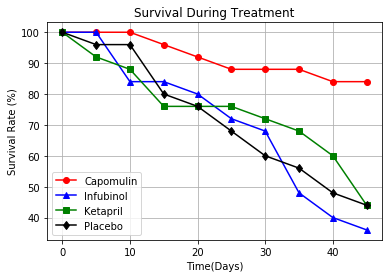

In [18]:
# Generate the Plot (Accounting for percentages)

x_axis=survival_df.index

Capomulin_axis=survival_df['Capomulin'].values
lineplot = plt.plot(x_axis, Capomulin_axis, marker ='o', color='R', label="Capomulin")


Infubinol_axis=survival_df['Infubinol'].values
lineplot = plt.plot(x_axis, Infubinol_axis, marker ='^', color='B', label="Infubinol")


Ketapril_axis=survival_df['Ketapril'].values
lineplot = plt.plot(x_axis, Ketapril_axis, marker ='s', color='G', label="Ketapril")


Placebo_axis=survival_df['Placebo'].values
lineplot = plt.plot(x_axis, Placebo_axis, marker ='d', color='K', label="Placebo")


# Adds a legend and sets its location to the upper left
plt.legend(loc="best")

# Add Title and labels to the x and y axes
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")

# Set a grid on the plot
plt.grid()

# Save the Figure
#plt.savefig("../Images/Tumor response w error bar.png")
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [20]:

#Generating volume change ist using a for loop
volume_change= []
for i in organized_df.columns:
    change= ((organized_df.loc[45,i]-organized_df.loc[0,i])/(organized_df.loc[0,i]))*100
    volume_change.append(change)

#print(['{:%.2f}'.format(item) for item in volume_change])  

#for item in volume_change:
#    item=['{:.2f}'.format(item)]
    
print(volume_change)    

[-19.475302667894173, 46.12347172785187, 57.028794686606076, 51.29796048315153]


In [21]:
#x_axis = np.arange(len(volume_change))
#plt.bar(x_axis, volume_change, color='r', align="center")


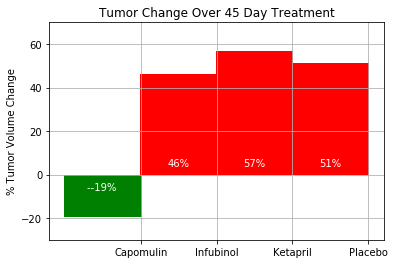

In [22]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs
fig, barx = plt.subplots()
ind = np.arange(len(volume_change))  
width = 1.022
rectsPass = barx.bar(ind[0], volume_change[0], width, color='g' )
rectsFail = barx.bar(ind[1:], volume_change[1:], width, color='r')

# Orient widths. Add labels, tick marks, etc. 
barx.set_ylabel('% Tumor Volume Change')
barx.set_title('Tumor Change Over 45 Day Treatment')
barx.set_xticks(ind +.5)
barx.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
barx.set_autoscaley_on(False)
barx.set_ylim([-30,70])
barx.grid(True)


# Use functions to label the percentages of changes

def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        barx.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        barx.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls

autolabelPass(rectsPass)
autolabelFail(rectsFail)
# Save the Figure


# Show the Figure
fig.show()